In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from fractions import Fraction as frac
import sys

# Visualizing the Sigmoid Function


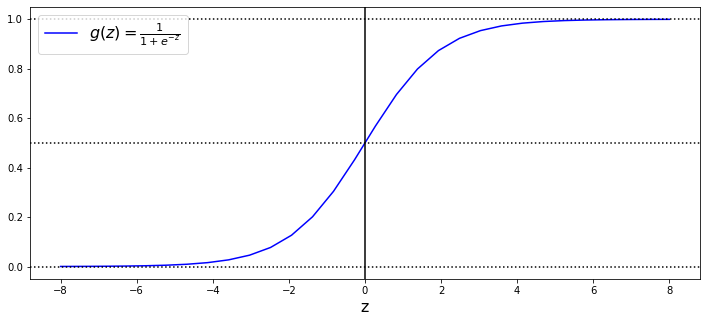

In [2]:
z = np.linspace(-8,8,30)
plt.figure(figsize=(12,5))
plt.plot(z, 1/(1+math.e**(-z)), color = "blue", label = r'$g(z) = \frac{1}{1+e^{-z}}$')
plt.axvline(x = 0, color='black', linestyle='-')
plt.axhline(y = 1, color='black', linestyle = 'dotted')
plt.axhline(y = 0.5, color='black', linestyle = 'dotted')
plt.axhline(y = 0, color='black', linestyle = 'dotted')
plt.xlabel('z', fontsize = 16)
plt.legend(loc=2, prop={'size': 16})
plt.show()

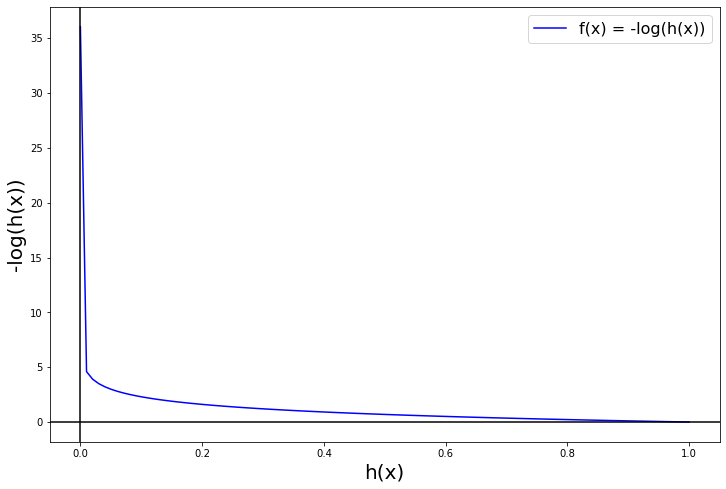

In [3]:
epsilon = sys.float_info.epsilon
x = np.linspace(epsilon,1,100)
plt.figure(figsize=(12,8))
plt.plot(x, -np.log(x), color = "blue", label = r'f(x) = -log(h(x))')
plt.axvline(x = 0, color='black')
plt.axhline(y = 0, color='black')
plt.legend(loc=1, prop={'size': 16})
plt.xlabel('h(x)', fontsize = 20)
plt.ylabel('-log(h(x))', fontsize = 20)
plt.show()

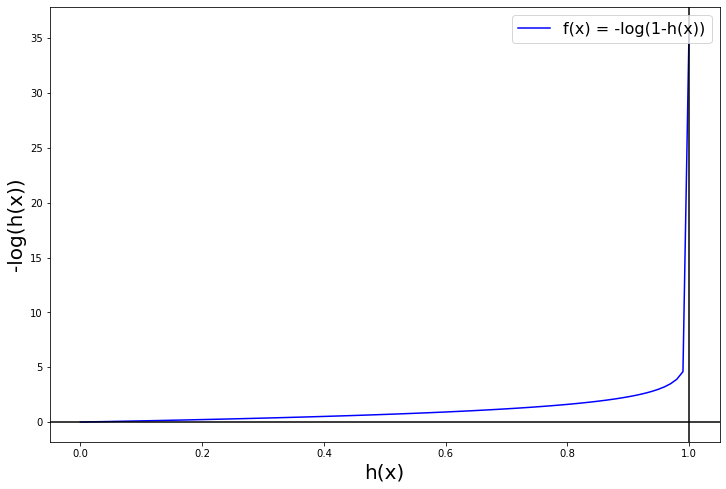

In [4]:
x = np.linspace(0,1-epsilon,100)
plt.figure(figsize=(12,8))
plt.plot(x, -np.log(1-x), color = "blue", label = r'f(x) = -log(1-h(x))')
plt.axvline(x = 1, color='black')
plt.axhline(y = 0, color='black')
plt.legend(loc=1, prop={'size': 16})
plt.xlabel('h(x)', fontsize = 20)
plt.ylabel('-log(h(x))', fontsize = 20)
plt.show()

# Implementing Gradient Descent

In [5]:
def generateXvector(X):
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes values 
    """
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

In [6]:
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(len(X[0])+1, 1)
    return theta

In [7]:
def sigmoid_function(X):
    """ Calculate the sigmoid value of the inputs
         Parameters:
          X:  values
        Return value: the sigmoid value
    """
    return 1/(1+math.e**(-X))

In [8]:
def Logistics_Regression(X,y,learningrate, iterations):
    """ Find the Logistics regression model for the data set
         Parameters:
          X: independent variables matrix
          y: dependent variables matrix
          learningrate: learningrate of Gradient Descent
          iterations: the number of iterations
        Return value: the final theta vector and the plot of cost function
    """
    y_new = np.reshape(y, (len(y), 1))   
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)
    for i in range(iterations):
        gradients = 2/m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
        theta = theta - learningrate * gradients
        y_pred = sigmoid_function(vectorX.dot(theta))
        cost_value = - np.sum(y_new*np.log(y_pred)+ ((1-y_new)*np.log(1-y_pred)))/(len(y_pred))
 #Calculate the loss for each training instance
        cost_lst.append(cost_value)
    plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
    plt.title('Cost function Graph')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    return theta

# Examining our Algorithm


In [9]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"]
y = (iris["target"] == 0).astype(np.int) #return 1 if Iris Versicolor, else 0.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'none')
classifier.fit(X_train, y_train)
classifier.intercept_, classifier.coef_

(array([-11.07402312]),
 array([[ -1.32289075,   4.23503694, -10.11887281,  -9.22137322]]))

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

1.0

array([[-10.81166363],
       [ -2.36666046],
       [  5.55693637],
       [-10.29389333],
       [ -9.64684255]])

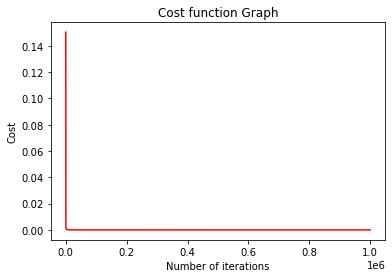

In [25]:
Logistics_Regression(X_train,y_train, 1, 1000000)

In [16]:
def column(matrix, i):
    """ Returning all the values in a specific columns
         Parameters:
          X: the input matrix
          i: the column
     Return value: an array with desired column
    """
    return [row[i] for row in matrix]

def accuracy_LR(X,y,learningrate, iteration,X_test, y_test):
    """ Returning the accuracy score for a training model
    
    """
    ideal = Logistics_Regression(X,y,learningrate, iteration)
    hypo_line = ideal[0]
    for i in range(1,len(ideal)):
        hypo_line = hypo_line + ideal[i]*column(X_test,i-1)
    logistic_function = sigmoid_function(hypo_line)
    for i in range(len(logistic_function)):
        if logistic_function[i] >= 0.5:
            logistic_function[i] = 1
        else:
            logistic_function[i] = 0
    last1 = np.concatenate((logistic_function.reshape(len(logistic_function),1), y_test.reshape(len(y_test),1)),1)
    count = 0
    for i in range(len(y_test)):
        if last1[i][0] == last1[i][1]:
            count = count+1
    acc = count/(len(y_test))
    return acc
        

1.0

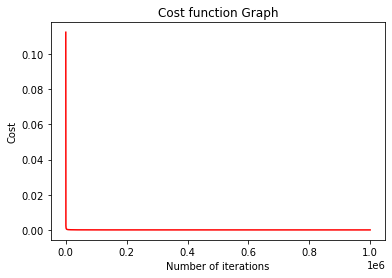

In [17]:
accuracy_LR(X_train,y_train, 1, 1000000,X_test, y_test)